In [162]:
import nltk
import pandas as pd
# nltk.download()

In [163]:
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGrap

O que podemos fazer com o NLTK?

In [164]:
from nltk.corpus import stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Básico do NLP: Lendo dados de texto e por que devemos limpar o texto?

### Lendo dados de texto semi-estruturados

In [165]:
data = open(".\\ex_files\\Ch01\\01_03\\Start\\SMSSpamCollection.tsv").read()

data[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [166]:
dados_analisados = data.replace('\t', '\n').split('\n')

In [167]:
dados_analisados[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

Isso nos possibilita criar uma lista com uma melhor estrutura.

In [168]:
label_lista = dados_analisados[0::2]
texto_lista = dados_analisados[1::2]

In [169]:
print(label_lista[0:5])
print(texto_lista[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


Com isso, podemos criar uma base de dados do pandas para organizar os resultados. Mas antes, temos que verificar se as listas possuem o mesmo tamanho, para que possamos criar uma base de dados sem grandes problemas

In [170]:
print(len(label_lista))
print(len(texto_lista))

5571
5570


Podemos observar que a variável *label_lista* possui um elemento a mais que a *texto_lista*. Antes de tomarmos alguma decisão sobre como agir diante dessa discrepância do número de elementos, vamos investigar para o *label_lista* quais os elementos presentes na lista. Isso, pois estamos esperando que este possua apenas dois únicos valores: *ham* e *spam*. 

In [171]:
label_set = set(label_lista)
label_set

{'', 'ham', 'spam'}

Podemos observar que há um elemento nulo, não esperado para os tipos de dados que estamos trabalhando para esta lista. Podemos tentar rastrear quantos elementos nulos possuem na lista, de modo a verificar se há somente um elemento nulo (o que explicaria a contagem do elemento a mais, nos levando a resolver este problema).

In [172]:
label_lista.index('')

5570

Podemos observar que a primeira ocorrência do elemento nulo aparece na posição *5570* da lista, ou seja, comparando com o tamanho da lista, este se apresenta no final da lista, como podemos observar abaixo

In [173]:
label_lista[-5:]

['ham', 'ham', 'ham', 'ham', '']

Podemos, podemos simplesmente dropar o último termo.

In [174]:
label_lista = label_lista[:-1]

In [175]:
label_lista[-5:]

['spam', 'ham', 'ham', 'ham', 'ham']

Agora o tamanho da *label_lista* é igual ao tamanho da *texto_lista*.

In [176]:
print(len(label_lista))
print(len(texto_lista))

5570
5570


In [177]:
full_corpus = pd.DataFrame({'label': label_lista, 'texto': texto_lista})

full_corpus.head()

,label,texto
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


## Explorando a Base de Dados

In [178]:
# Qual é o formato do dataset?

print("O dado de entrada tem {} linhas e {} colunas".format(full_corpus.shape[0], full_corpus.shape[1]))

O dado de entrada tem 5570 linhas e 2 colunas


In [179]:
# Quantos dados são spam e quantos são ham?

print("De {} dados de entrada, {} são spams e {} são hams".format(len(full_corpus), full_corpus['label'].value_counts()[1], full_corpus['label'].value_counts()[0]))

De 5570 dados de entrada, 746 são spams e 4824 são hams


In [180]:
# Quantos dados faltantes existem?
print("Numero de dados faltantes em label: {}".format(full_corpus['label'].isnull().sum()))
print("Numero de dados faltantes em texto: {}".format(full_corpus['texto'].isnull().sum()))

Numero de dados faltantes em label: 0
Numero de dados faltantes em texto: 0


## Aprendendo como Usar Expressões Regulares

In [181]:
import re

re_teste = "This is a made up string to test 2 different regex methods"
re_test_messy = 'This              is a made up           string to test 2    different regex methods'
re_test_messy_1 = 'This-is-a-made/up.string*to>>>>>>>test-----2"""""different-regex-methods'

In [182]:
# Dividindo a sentença em uma lista de palavras
re.split("\s", re_teste)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [183]:
re.split('\s+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [184]:
re.split('\W+', re_test_messy_1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [185]:
re.findall('\S+', re_teste)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [186]:
re.findall("\S+", re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [187]:
re.findall("\w+", re_test_messy_1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [188]:
#Substituindo uma string específica
pep8_string = "I try to follow PEP8 guidelines"
pep7_string = "I try to follow PEP7 guidelines"
peep8_string = "I try to follow PEEP8 guidelines"

In [189]:
re.findall('[a-z]+', pep8_string)

['try', 'to', 'follow', 'guidelines']

In [190]:
re.findall('[A-Z]+', pep8_string)

['I', 'PEP']

In [191]:
# letras de A a Z capitalizadas ou números de 0 a 9
re.findall('[A-Z0-9]+', pep8_string)

['I', 'PEP8']

In [192]:
# letras de A a Z capitalizadas e números de 0 a 9
re.findall('[A-Z]+[0-9]+', pep8_string)

['PEP8']

In [193]:
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', pep8_string)

'I try to follow PEP8 Python Styleguide guidelines'

In [194]:
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', pep8_string)

'I try to follow PEP8 Python Styleguide guidelines'

In [195]:
re.sub('[A-Z]+[0-9]+', 'PEEP8 Python Styleguide', peep8_string)

'I try to follow PEEP8 Python Styleguide guidelines'

## Implementando um Pipeline para Limpar o Texto

### Pré-processamento dos Dados de Texto
Para limpar os dados de texto, é necessário que evidenciemos algumas características que queremos que o nosso modelo de Machine Learning aprenda. Limpando (ou realizando um pré-processamento) nos dados de texto, geralmente, consiste nos seguintes passos:

1. Remover pontuações
2. Tokenização
3. Remover stopwords
4. Lemmatização/Stemização

Os primeiros três passos serão feitos nesta parte, pois eles são implementados na grande maioria de qualquer pipeline de limpeza de texto. Lematização e Stemização serão implementados posteriormente, tendo em vista que eles são úteis, porém não críticos para o bom funcionamento do modelo.

In [196]:
pd.set_option('display.max_colwidth', 100)

data=pd.read_csv(".\\ex_files\\Ch01\\01_03\\Start\\SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'texto']

data.head()

,label,texto
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [197]:
# Como um dado limpo deve parecer?
data_limpo = pd.read_csv(".\\ex_files\\Ch01\\01_09\\Start\\SMSSpamCollection_cleaned.tsv", sep='\t', header=None)
data_limpo.head()

,0,1,2
0,label,body_text,body_text_nostop
1,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"['ive', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', '..."
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005..."
3,ham,"Nah I don't think he goes to usf, he lives around here though","['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']"
4,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']"


### Removendo a pontuação

In [198]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [199]:
def remove_punct(text):
  text_nopunct = "".join([char for char in text if char not in string.punctuation])
  return text_nopunct

data['texto_limpo'] = data['texto'].apply(lambda x: remove_punct(x))
data

,label,texto,texto_limpo
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL
...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,This is the 2nd time we have tried 2 contact u U have won the £750 Pound prize 2 claim is easy c...
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home
5565,ham,"Pity, * was in mood for that. So...any other suggestions?",Pity was in mood for that Soany other suggestions
5566,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,The guy did some bitching but I acted like id be interested in buying something else next week a...


### Tokenização

In [200]:
def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens


data['texto_tokenizado'] = data['texto_limpo'].apply(lambda x: tokenize(x.lower()))

In [201]:
data.head()

,label,texto,texto_limpo,texto_tokenizado
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


### Removendo as Stopwords

In [202]:
stopword = nltk.corpus.stopwords.words('english')

In [203]:
def remove_stopwords(tokenized_list):
  text = [word for word in tokenized_list if word not in stopword]
  return text


data['texto_sem_stopwords'] = data['texto_tokenizado'].apply(lambda x: remove_stopwords(x))
data.head()

,label,texto,texto_limpo,texto_tokenizado,texto_sem_stopwords
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


### Estemização
Reduzir uma palavra flexida à sua raiz, ou seja, reduzir ao seu radical.


#### Testando o algoritmo de estemização de Porter

In [204]:
ps = nltk.PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [205]:
print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

grow
grow
grow


In [206]:
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))

run
run
runner


##### Usando no Texto Bruto

In [207]:
stopwords = nltk.corpus.stopwords.words('english')

data = pd.read_csv(".\\ex_files\\Ch01\\01_03\\Start\\SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'texto']

data.head()

,label,texto
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [208]:
# Função para limpar o texto
def clean_text(text):
  text = ''.join([word for word in text if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [word for word in tokens if word not in stopwords]
  return text

data['texto_limpo'] = data['texto'].apply(lambda x: clean_text(x.lower()))

In [209]:
data.head()

,label,texto,texto_limpo
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"


In [210]:
# Estemizando o texto
def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text


data['texto_estemizado'] = data['texto_limpo'].apply(lambda x: stemming(x))
data.head()


,label,texto,texto_limpo,texto_estemizado
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"


### Lematização

Processo de agrupar as formas infleccionadas de uma palavra de maneira que eles possam analisá-las como um único termo identificado como lema de uma palavra.

In [211]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [212]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [213]:
print(ps.stem('meanness'))
print(ps.stem('meaning'))

mean
mean


In [214]:
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

meanness
meaning


In [215]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [216]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


#### Usando no Texto Bruto

In [217]:
stopwords = nltk.corpus.stopwords.words('english')

data = pd.read_csv(".\\ex_files\\Ch01\\01_03\\Start\\SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'texto']

In [218]:
# Limpando o texto 
def clean_text(text):
  text = ''.join([word for word in text if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [word for word in tokens if word not in stopwords]
  return text

data['texto_limpo'] = data['texto'].apply(lambda x: clean_text(x.lower()))


data.head()

,label,texto,texto_limpo
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"


In [219]:
# Lematizando o texto
def lemmatize_text(tokenized_text):
  text = [wn.lemmatize(word) for word in tokenized_text]
  return text


data['texto_lematizado'] = data['texto_limpo'].apply(lambda x: lemmatize_text(x))
data.head(10)

,label,texto,texto_limpo,texto_lematizado
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
5,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."
6,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170...","[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170..."
7,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[mobile, 11, months, u, r, entitled, update, latest, colour, mobiles, camera, free, call, mobile...","[mobile, 11, month, u, r, entitled, update, latest, colour, mobile, camera, free, call, mobile, ..."
8,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ...","[im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, ive, cried, enough, today]","[im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, ive, cried, enough, today]"
9,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ...","[six, chances, win, cash, 100, 20000, pounds, txt, csh11, send, 87575, cost, 150pday, 6days, 16,...","[six, chance, win, cash, 100, 20000, pound, txt, csh11, send, 87575, cost, 150pday, 6days, 16, t..."


## Vectorização

### Vectorização Contada
Cria uma matriz documento-termo onde a entrada de cada céleula será a contagem do número de vezes que uma palavra aparece no documento.

In [220]:
# Lendo o texto
stopwords = nltk.corpus.stopwords.words('english')

ps = nltk.PorterStemmer()

data = pd.read_csv(".\\ex_files\\Ch01\\01_03\\Start\\SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'texto']

In [221]:
# Criando a função para remover pontuação, stopwords, tokenizar e estemizar

def clean_text(text):
  text = ''.join([word for word in text if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

In [222]:
# Aplicando o CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)

x_counts = count_vect.fit_transform(data['texto'])
print(x_counts.shape)
# print(count_vect.get_feature_names())


(5568, 8337)


In [223]:
# Aplicando o CountVectorizer para uma amostra menor
data_sample = data[0:20]

count_vect_sample = CountVectorizer(analyzer=clean_text)
x_counts_sample = count_vect_sample.fit_transform(data_sample['texto'])

print(x_counts_sample.shape)

(20, 221)


#### Vetorizando a saída de uma matriz esparsa

Matriz Esparsa: Uma matriz cuja maioria das entradas são 0. De modo a aumentar a eficiência do armazenamento da matriz, é armazenado apenas as localizações das entradas não nulas.

In [224]:
x_counts_sample

<20x221 sparse matrix of type '<class 'numpy.int64'>'
	with 253 stored elements in Compressed Sparse Row format>

In [225]:
x_counts_df = pd.DataFrame(x_counts_sample.toarray())

x_counts_df

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [226]:
x_counts_df.columns = count_vect_sample.get_feature_names()
x_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


### Vetorizando Dados Brutos: N-Grams

In [227]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv(".\\ex_files\\Ch01\\01_03\\Start\\SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'texto']

In [228]:
# Criando uma função para remover pontuação, stopwords, tokenizar e estemizar
def clean_text(text):
  text = ''.join([word for word in text if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text


data['texto_limpo'] = data['texto'].apply(lambda x: clean_text(x.lower()))
data.head()

,label,texto,texto_limpo
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"


In [229]:
# Aplicando o CountVectorizer (com o N-Grams)
from sklearn.feature_extraction.text import CountVectorizer
ngram_vect = CountVectorizer(analyzer=clean_text, ngram_range=(2,2))

x_counts = ngram_vect.fit_transform(data['texto_limpo'])
print(x_counts.shape)
# print(ngram_vect.get_feature_names())

(5568, 5108)


In [230]:
# Aplicando o CountVectorizer com o n-grams para uma amostra pequena
data_sample = data[0:20]

ngram_vect_sample = CountVectorizer(analyzer=clean_text, ngram_range=(2,2))
x_counts_sample = ngram_vect_sample.fit_transform(data_sample['texto_limpo'])
print(x_counts_sample.shape)

(20, 20)


In [231]:
x_counts_df = pd.DataFrame(x_counts_sample.toarray())

x_counts_df.columns = ngram_vect_sample.get_feature_names()
x_counts_df

,aftfinishlunchgostrlorard3smthlorufinishurlunchalreadi,datesunday,ehurememb2spellnameyevnaughtimakevwet,englandvmacedoniadontmissgoalsteamnewstxturnationteam87077egengland87077trywalscotland4txtú120poboxox36504w45wq16,evenbrotherlikespeaktreatlikeaidpat,finewayufeelwaygotab,freeentri2wklicompwinfacupfinaltkt21stmay2005textfa87121receiventriquestionstdtxtratetcappli08452810075over18,gotri2monthhahajok,imgonnahomesoondontwanttalkstuffanymortonightkivecrienoughtoday,ivesearchrightwordthankbreatherpromiswonttakehelpgrantfulfilpromiswonderblesstim,mobil11monthurentitlupdatlatestcolourmobilcamerafreecallmobilupdatcofree08002986030,nahdontthinkgoeusflivearoundthough,ohkimwatch,perrequestmellmelloruminnaminungintnurunguvettamsetcallertuncallerpress9copifriendcallertun,seriousspellnam,sixchancwincash10020000poundtxtcsh11send87575cost150pday6day16tsandcapplireplihl4info,urgent1weekfreemembership100000prizejackpottxtwordclaim81010tcwwwdbuknetlccltdpobox4403ldnw1a7rw18,winnervalunetworkcustomselectreceivea900prizerewardclaimcall09061701461claimcodekl341valid12hour,xxxmobilemovieclubusecreditclickwaplinknexttxtmessagclickhttpwapxxxmobilemovieclubcomnqjkgighjjgcbl,üpayfirstlardastockcomin
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Usando o TF-IDF

In [232]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv(".\\ex_files\\Ch01\\01_03\\Start\\SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'texto']

In [233]:
# Criando uma função para remover pontuação, stopwords, tokenizar e estemizar
def clean_text(text):
  text = ''.join([word for word in text if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

In [234]:
# Aplicando o TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
x_tfidf = tfidf_vect.fit_transform(data['texto'])
print(x_tfidf.shape)

(5568, 8337)


In [235]:
# Aplicando o TfidfVectorizer para uma amostra pequena
data_sample = data[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
x_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['texto'])
print(x_tfidf_sample.shape)

(20, 221)


In [236]:
# Vetorizando saídas de matrizes esparsas
x_tfidf_df = pd.DataFrame(x_tfidf_sample.toarray())
x_tfidf_df.columns = tfidf_vect_sample.get_feature_names()
x_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,ü
0,0.000000,0.000000,0.0000,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.230352,0.230352,0.202483,0.00000,0.000000,0.000000,0.000000,0.202483,0.000000
1,0.000000,0.198986,0.0000,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,...,0.198986,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0000,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0000,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0000,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.0000,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.2226,0.00000,0.000000,0.00000,0.000000,0.2226,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.189543,0.000000,0.0000,0.00000,0.000000,0.00000,0.189543,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.0000,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.0000,0.00000,0.219424,0.00000,0.000000,0.0000,0.219424,0.192877,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


## Engenharia de Atributos

### Criação de Atributos

In [237]:
# Lendo o texto
data = pd.read_csv(".\\ex_files\\Ch01\\01_03\\Start\\SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'texto']

In [238]:
# Criando o atributo para o tamanho da mensagem de texto
data['tamanho_texto'] = data['texto'].apply(lambda x: len(x) - x.count(" "))
data.head()

,label,texto,tamanho_texto
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
2,ham,"Nah I don't think he goes to usf, he lives around here though",49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [239]:
# Criando um atributo para a porcentagem de pontuações num texto
def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3) * 100

data['pct_punct'] = data['texto'].apply(lambda x: count_punct(x))

data.head()

,label,texto,tamanho_texto,pct_punct
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [240]:
# Avaliando os atributos criados
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [241]:
plt.hist()

TypeError: hist() missing 1 required positional argument: 'x'

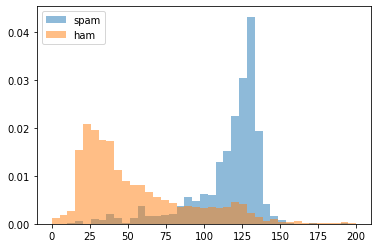

In [ ]:
bins = np.linspace(0, 200, 40)

plt.hist(data[data['label']=='spam']['tamanho_texto'], bins, alpha=0.5, density=True, stacked=True, label='spam')

plt.hist(data[data['label']=='ham']['tamanho_texto'], bins, alpha=0.5, density=True, stacked=True, label='ham')

plt.legend(loc='upper left')

plt.show()

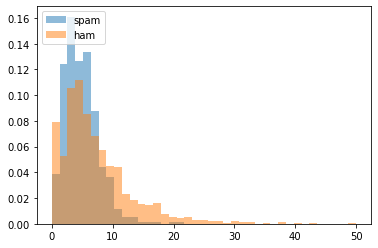

In [ ]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label']=='spam']['pct_punct'], bins, alpha=0.5, density=True, stacked=True, label='spam')
plt.hist(data[data['label']=='ham']['pct_punct'], bins, alpha=0.5, density=True, stacked=True, label='ham')
plt.legend(loc='upper left')

plt.show()

#### Transformações

In [ ]:
data = pd.read_csv(".\\ex_files\\Ch01\\01_03\\Start\\SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'texto']

In [ ]:
# Criando dos dois novos atributos
def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3) * 100


data['tamanho_texto'] = data['texto'].apply(lambda x: len(x) - x.count(" "))
data['pct_punct'] = data['texto'].apply(lambda x: count_punct(x))

data.head()

,label,texto,tamanho_texto,pct_punct
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


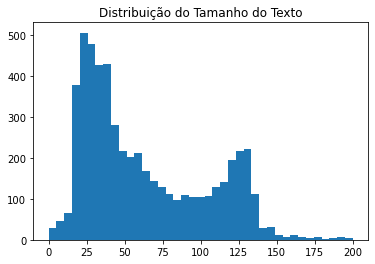

In [ ]:
# plotando os dois novos atributos

bins = np.linspace(0, 200, 40)
plt.hist(data['tamanho_texto'], bins)
plt.title("Distribuição do Tamanho do Texto")

plt.show()

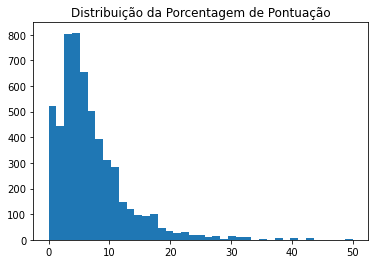

In [ ]:
bins = np.linspace(0, 50, 40)

plt.hist(data['pct_punct'], bins)
plt.title("Distribuição da Porcentagem de Pontuação")

plt.show()

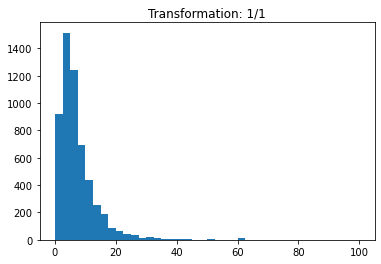

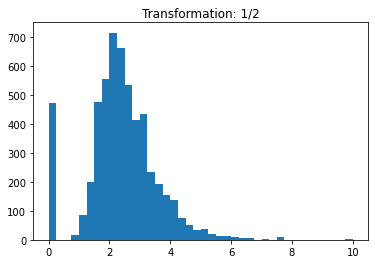

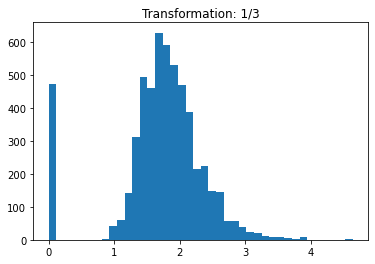

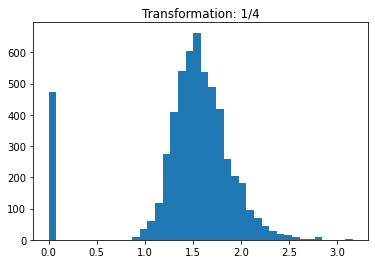

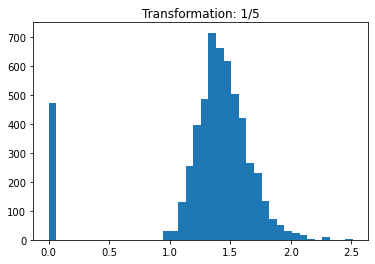

In [ ]:
for i in [1, 2, 3, 4, 5]:
  plt.hist(data['pct_punct']**(1/i), bins=40)
  plt.title("Transformation: 1/{}".format(str(i)))
  plt.show()

## Construindo o Classificador Baseado no Modelo de Random Forest

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv(".\\ex_files\\Ch01\\01_03\\Start\\SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label', 'texto']

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3) * 100

data['tamanho_texto'] = data['texto'].apply(lambda x: len(x) - x.count(" "))
data['pct_punct'] = data['texto'].apply(lambda x: count_punct(x))

def clean_text(text):
  text = ''.join([word for word in text if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [ps.stem(word) for word in tokens if word not in stopwords]
  return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
x_tfidf = tfidf_vect.fit_transform(data['texto'])

x_features = pd.concat([data['tamanho_texto'], data['pct_punct'], pd.DataFrame(x_tfidf.toarray())], axis=1)
x_features.head()

,tamanho_texto,pct_punct,0,1,2,3,4,5,6,7,...,8327,8328,8329,8330,8331,8332,8333,8334,8335,8336
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

print(dir(RandomForestClassifier))


['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier()


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5, shuffle=True, random_state=13)
cross_val_score(rf, x_features, data['label'], cv=k_fold, n_jobs=-1, scoring='accuracy')

array([0.97755835, 0.96588869, 0.97666068, 0.98113208, 0.97753819])

### Random Forest com um conjunto de testes

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features, data['label'], test_size=0.2, random_state=13)

In [ ]:
# Vamos definir o número de estimadores como 50
rf = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_depth=20)
rf_model = rf.fit(x_train, y_train)

In [ ]:
sorted(zip(rf_model.feature_importances_, x_train.columns), reverse=True)[0:10]

[(0.054232177903570905, 7577),
 (0.04281747407847671, 2244),
 (0.029745018699504536, 'tamanho_texto'),
 (0.028889687133224703, 3349),
 (0.02706204244192312, 2017),
 (0.026253302589391028, 7247),
 (0.02420770764486426, 5009),
 (0.01845623185839983, 7445),
 (0.017291272416531455, 1572),
 (0.016245020068632914, 695)]

In [ ]:
y_pred = rf_model.predict(x_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

In [ ]:
print("Precision: {} / Recall: {} / Accuracy: {}".format(round(precision, 3),
                                                         round(recall, 3),
                                                         round((y_pred==y_test).sum() / len(y_pred), 3)))

Precision: 1.0 / Recall: 0.581 / Accuracy: 0.94


### Explorando o Random Forest com o GridSearchCV

#### Construindo o nosso Grid-Search

In [ ]:
def train_RF(n_est, depth):
  rf = RandomForestClassifier(n_estimators=n_est, n_jobs=-1, max_depth=depth)
  rf_model = rf.fit(x_train, y_train)
  y_pred = rf_model.predict(x_test)
  precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
  print("Est: {} / Depth: {} --- Precision: {} / Recall: {} / Accuracy: {}".format(
    n_est, depth, round(precision, 3), round(recall, 3), round((y_pred==y_test).sum() / len(y_pred), 3)))
  


In [ ]:
for n_est in [10, 50, 100]:
  for depth in [10, 20, 30, None]:
    train_RF(n_est, depth)

Est: 10 / Depth: 10 --- Precision: 1.0 / Recall: 0.281 / Accuracy: 0.897
Est: 10 / Depth: 20 --- Precision: 1.0 / Recall: 0.562 / Accuracy: 0.937
Est: 10 / Depth: 30 --- Precision: 1.0 / Recall: 0.719 / Accuracy: 0.96
Est: 10 / Depth: None --- Precision: 0.985 / Recall: 0.825 / Accuracy: 0.973
Est: 50 / Depth: 10 --- Precision: 1.0 / Recall: 0.262 / Accuracy: 0.894
Est: 50 / Depth: 20 --- Precision: 1.0 / Recall: 0.581 / Accuracy: 0.94
Est: 50 / Depth: 30 --- Precision: 1.0 / Recall: 0.788 / Accuracy: 0.969
Est: 50 / Depth: None --- Precision: 1.0 / Recall: 0.838 / Accuracy: 0.977
Est: 100 / Depth: 10 --- Precision: 1.0 / Recall: 0.256 / Accuracy: 0.893
Est: 100 / Depth: 20 --- Precision: 1.0 / Recall: 0.581 / Accuracy: 0.94
Est: 100 / Depth: 30 --- Precision: 1.0 / Recall: 0.738 / Accuracy: 0.962
Est: 100 / Depth: None --- Precision: 1.0 / Recall: 0.831 / Accuracy: 0.976


#### Usando o GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300], 'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(x_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,53.761847,4.617131,1.305536,0.449393,None,300,"{'max_depth': None, 'n_estimators': 300}",0.961841,0.980920,0.978676,0.978676,0.979775,0.975978,0.007117,1
7,25.390609,2.956894,0.506604,0.112009,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.964085,0.978676,0.977553,0.980920,0.978652,0.975977,0.006046,2
8,50.370182,3.630486,0.690038,0.146197,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.964085,0.978676,0.976431,0.976431,0.977528,0.974630,0.005337,3
4,19.257735,2.792863,0.440003,0.252008,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.960718,0.977553,0.978676,0.977553,0.973034,0.973507,0.006682,4
10,26.814755,3.201821,0.659416,0.432449,None,150,"{'max_depth': None, 'n_estimators': 150}",0.958474,0.976431,0.975309,0.975309,0.978652,0.972835,0.007284,5


In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300], 'max_depth': [30, 60, 90, None]}

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
x_count = count_vect.fit_transform(data['texto'])
x_count_feat = pd.concat([data['tamanho_texto'], data['pct_punct'], pd.DataFrame(x_count.toarray())], axis=1)


gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(x_count_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,56.445201,5.362502,2.839119,2.594609,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977558,0.974865,0.973968,0.967655,0.973944,0.973598,0.003252,1
8,52.910853,10.430386,5.607146,2.669621,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.976661,0.974865,0.974865,0.968553,0.972147,0.973418,0.002828,2
10,33.400646,14.586001,4.636010,4.335708,None,150,"{'max_depth': None, 'n_estimators': 150}",0.977558,0.974865,0.971275,0.968553,0.971249,0.972700,0.003150,3
6,6.939575,4.235669,0.780448,1.061562,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.977558,0.971275,0.969479,0.969452,0.974843,0.972521,0.003193,4
7,30.395813,3.434026,7.116978,4.837746,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.977558,0.973968,0.973070,0.966757,0.971249,0.972520,0.003539,5


## Explorando o modelo Gradient Boosting com o Grid Search

In [ ]:
# Explorando os atributos e hiperparâmetros do GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

print(dir(GradientBoostingClassifier))

['_SUPPORTED_LOSS', '__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_initialized', '_check_n_features', '_check_params', '_clear_state', '_compute_partial_dependence_recursion', '_estimator_type', '_fit_stage', '_fit_stages', '_get_param_names', '_get_tags', '_init_state', '_is_initialized', '_make_estimator', '_more_tags', '_raw_predict', '_raw_predict_init', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_resize_state', '_staged_raw_predict', '_validate_data', '_validate_estimator', '_validate_y', 'apply', 'decision_function', 'fe

In [ ]:
# Construindo o nosso próprio Grid Search
def train_GB(est, max_depth, lr):
  gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
  gb_model = gb.fit(x_train, y_train)
  y_pred = gb_model.predict(x_test)
  precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
  print("Est: {} / Depth: {} / LR: {} --- Precision: {} / Recall: {} / Accuracy: {}".format(
    est, max_depth, lr, round(precision, 3), round(recall, 3), round((y_pred==y_test).sum() / len(y_pred), 3)))

In [ ]:
for n_est in [50, 100, 150]:
  for max_depth in [3, 7, 11, 15]:
    for lr in [0.01, 0.1, 1]:
      train_GB(n_est, max_depth, lr)

KeyboardInterrupt: 

In [ ]:
gb = GradientBoostingClassifier()
param = {'n_estimators': [100, 150], 'max_depth': [7, 11, 15], 'learning_rate': [0.1]}

gs = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = gs.fit(x_features, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

In [ ]:
gb = GradientBoostingClassifier()
param = {'n_estimators': [100, 150], 'max_depth': [7, 11, 15], 'learning_rate': [0.1]}

gs = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = gs.fit(x_count_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

In [ ]:
data.shape

(5568, 4)

In [ ]:
len(data)

5568